<b> Anggota : <br> </b>
Akmal Adi S (17/412630/PA/17949) <br>
Hans Satria Kusuma (17/409435/PA/17742) <br>
Yusfi Adilaksa (17/412657/PA/17976) <br>
Yusuf Yudhistira (18/430276/PA/18789) - Capt<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Read Data Set

In [ ]:
dataset = pd.read_csv('/content/drive/Shareddrives/Algen/DataSet.csv')
ihk = dataset.iloc[:,0].values
jumlahUangBeredar = dataset.iloc[:,1].values
biRate = dataset.iloc[:,2].values
kurs = dataset.iloc[:,3].values

## Membuat Individu




In [ ]:
from random import randint, random, uniform
# min, max = interval nilai random
def individual(min, max):
    length = 4
    return [ uniform(min,max) for x in range(length) ]

## Membuat Populasi

In [ ]:
# count = ukuran populasi
# min, max = interval nilai random

def population(count, min, max):
    return [ individual(min, max) for x in range(count) ]

## Fitness

In [ ]:
# Menghitung MAPE
def mape(listPrediksiIhk, listIhk): 
    actual = listIhk
    pred = listPrediksiIhk
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
    
# menghitung fitness
def fitness(individual):
    # Array Prediksi dan Nilai Sekarang
    listPrediksiIhk = []
    listIhk = []
    alfa = individual[0]
    betaX = individual[1]
    betaY = individual[2]
    betaZ = individual[3]
    # jumlah bulan pada dataset
    banyakBulan = len(biRate)

    # prediksi untuk bulan ke i
    for w in range(1,banyakBulan):
        listIhk.append(ihk[w])
        prediksi = 0
        #perulangan jumlah uang yang beredar
        tempUangBeredar = 0
        for indexUang in range(0, w):
            tempUangBeredar += betaX*jumlahUangBeredar[indexUang]

        #perulangan kurs (nilai tukar)
        tempKurs = 0
        for indexKurs in range(0, w):
            tempKurs += betaY*kurs[indexKurs]
        
        #perulangan BI Rate
        tempBiRate = 0
        for indexBiRate in range(0, w):
            tempBiRate += betaZ*biRate[indexBiRate]
        
        prediksi = alfa + tempUangBeredar + tempKurs + tempBiRate
        listPrediksiIhk.append(prediksi)
    return mape(listPrediksiIhk, listIhk)

### Selection (Baker SUS)

In [ ]:
import random

def selection(populasi):
    # berapa banyak hasil seleksi
    jumlahHasilSeleksi = 4
    listWeight = []
    # mencari fitness dari masing" individu, 100 - persentase fitness (untuk mengambil nilai fitness) 
    for individu in populasi:
        listWeight.append(100 - fitness(individu))
    return random.choices(populasi, weights=listWeight, k=jumlahHasilSeleksi)

## Crossover Whole Arithmethic

In [ ]:
def crossover(parents, populasi):
    # parents = parent hasil seleksi
    parentsLength = len(parents)
    # banyak anak yang akan dihasilkan
    childrenLength = len(populasi) - parentsLength
    # inisialisasi anak
    children = []

    #alfa untuk rumus crossover
    alfaCrossover = 0.5

    #melakukan crossover
    while len(children) < childrenLength:
        maleNumber = randint(0, parentsLength -1)
        femaleNumber = randint(0, parentsLength - 1)
        # melakukan crossover untuk parents yang berbeda
        if(maleNumber != femaleNumber):
          male = parents[maleNumber]
          female = parents[femaleNumber]
          tempChild = []
          # generate child 1
          for i in range(len(male)):
              z1 = alfaCrossover*female[i] + (1-alfaCrossover)*male[i]
              tempChild.append(z1)
          children.append(tempChild)
          tempChild = []
          # generate child 2
          for j in range(len(female)):
              z2 = alfaCrossover*male[i] + (1-alfaCrossover)*female[i]
              tempChild.append(z2)
          children.append(tempChild)
    # hasil crossover
    return children

### Uniform Mutation

In [ ]:
def mutation(individu, min, max):
    position = randint(0, len(individu) -1)
    mutateValue = uniform(min,max)
    individu[position] = mutateValue
    return individu[position]

## Mencari Prediksi IHK 

In [ ]:
def findIhk(individual):
    # Array Prediksi 
    listPrediksiIhk = []

    alfa = individual[0]
    betaX = individual[1]
    betaY = individual[2]
    betaZ = individual[3]
    # jumlah bulan pada dataset
    banyakBulan = len(ihk)
    # prediksi untuk bulan ke i
    for w in range(1,banyakBulan):
        prediksi = 0
        #perulangan jumlah uang yang beredar
        tempUangBeredar = 0
        for indexUang in range(0, w):
            tempUangBeredar += betaX*jumlahUangBeredar[indexUang]
        #perulangan kurs (nilai tukar)
        tempKurs = 0
        for indexKurs in range(0, w):
            tempKurs += betaY*kurs[indexKurs]
        
        #perulangan BI Rate
        tempBiRate = 0
        for indexBiRate in range(0, w):
            tempBiRate += betaZ*biRate[indexBiRate]
        
        prediksi = alfa + tempUangBeredar + tempKurs + tempBiRate
        listPrediksiIhk.append(prediksi)
    return listPrediksiIhk

### Main Code

Individu Terbaik :  [0.0005881344059401419, 0.0005881344059401419, 0.0005881344059401419, 0.0005881344059401419]
Prediksi IHK :  [1.1694758594916752, 2.329935618540288, 3.495276893158204, 4.671669213263735, 5.845597250208377, 7.004280843351051, 8.178479422122425, 9.359200411455676, 10.563123303103264, 11.796641118057762, 13.055878050584024, 14.38940812126864, 15.65622610628747, 16.92626706785085, 18.18529227199097, 19.463614165989988, 20.758909618944436, 22.0642856956167, 23.377695688274105, 24.69072927491171, 25.99927539603199, 27.30136380137505, 28.582843977133965, 29.90178831455127, 31.220491516862133, 32.52961400970023, 33.856774584768516, 35.17723042760909, 36.50245015913777, 37.853312550765445, 39.21795493152429, 40.59551274383759, 41.98635651238108, 43.36139122809289, 44.76041006487894, 46.18751231954863, 47.60199909121091, 48.990702050516774, 50.39545519776075, 51.81681726062847, 53.20787275755808, 54.59928113513127, 55.99855875105594, 57.402176798896434, 58.86971329397453, 60.

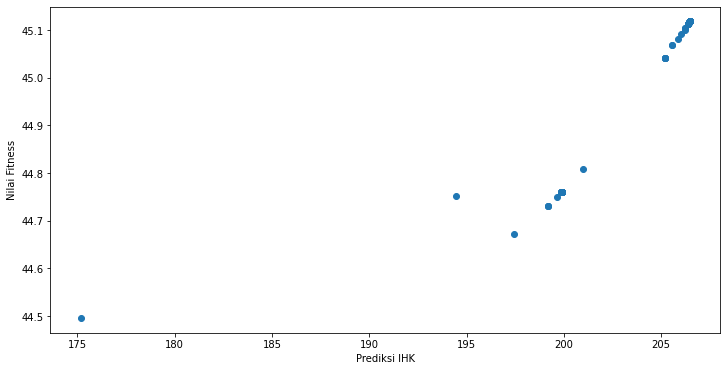

In [ ]:
# Adjustable param
Pc = 0.90 # 70%
Pm = 0.001 # 1%
MaxGenerasi = 10

nilaiMinGen = 0
nilaiMaxGen = 0.0008

# membuat populasi 
# TODO : Paremeter ukuran populasi
populasiAwal = population(24, nilaiMinGen, nilaiMaxGen)

tempIhkPredict = []
tempFitness = []

# membuat generasi
for i in range(MaxGenerasi):
    # melakukan seleksi
    hasilSeleksi = selection(populasiAwal)

    # melakukan crossover
    if Pc > random.random():
       hasilCrossover = crossover(hasilSeleksi, populasiAwal)
    # tidak melakukan crossover
    else:
      hasilCrossover = hasilSeleksi

    # gabungan hasil seleksi dan hasil crossover
    gabungan = hasilSeleksi + hasilCrossover

    # melakukan mutasi 
    index = -1
    for individu in gabungan:
        index += 1
        if Pm > random.random():
            # posisi gen yang akan dimutasi
            position = randint(0, len(individu) -1)
            mutateValue = uniform(nilaiMinGen,nilaiMaxGen)
            individu[position] = mutateValue
        # input hasil mutasi ke array gabungan || update generasi
        gabungan[index] = individu

    # hasil setelah mutasi di input ke populasi awal
    populasiAwal = gabungan   

    # varibel untuk menyimpan fitness terkecil dan dimana posisi individunya
    minFitness = fitness(populasiAwal[0])
    minIndex = 0

    # list fitness dari generasi terakhir
    for i in range(8):
      if(fitness(populasiAwal[i]) <= minFitness):
        minFitness = fitness(populasiAwal[i])
        minIndex = i

    prediksiIhk = findIhk(populasiAwal[minIndex])
    print("Individu Terbaik : ", populasiAwal[minIndex])
    print("Prediksi IHK : ", prediksiIhk)
    print("Nilai Fitness / % Error  :", minFitness, "\n")

    tempIhkPredict.append(prediksiIhk[127])
    tempFitness.append(minFitness)

plt.figure(figsize=(12,6))
plt.xlabel('Prediksi IHK')
plt.ylabel('Nilai Fitness')
plt.scatter(tempIhkPredict, tempFitness)
plt.show()
 
    